 # Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [3]:
#importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the datasets
products=pd.read_csv("Products.csv")
transactions=pd.read_csv("Transactions.csv")
customers=pd.read_csv("Customers.csv")

In [7]:
# Basic Dataset Information
print("Products Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())
print("\nCustomers Dataset Info:")
print(customers.info())

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2)

In [9]:
# Preview Data
print(customers.head()) 
print("\n")
print(products.head())
print("\n")
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

In [11]:
# Merging the datasets
merged = transactions.merge(products, on="ProductID").merge(customers, on="CustomerID")

In [13]:
# Checking for missing values
print("\nMissing values in Products dataset:")
print(products.isnull().sum())
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())




Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [15]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for Products:")
print(products.describe())
print("\nDescriptive statistics for Transactions:")
print(transactions.describe())


Descriptive statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Descriptive statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


###  Visualizations

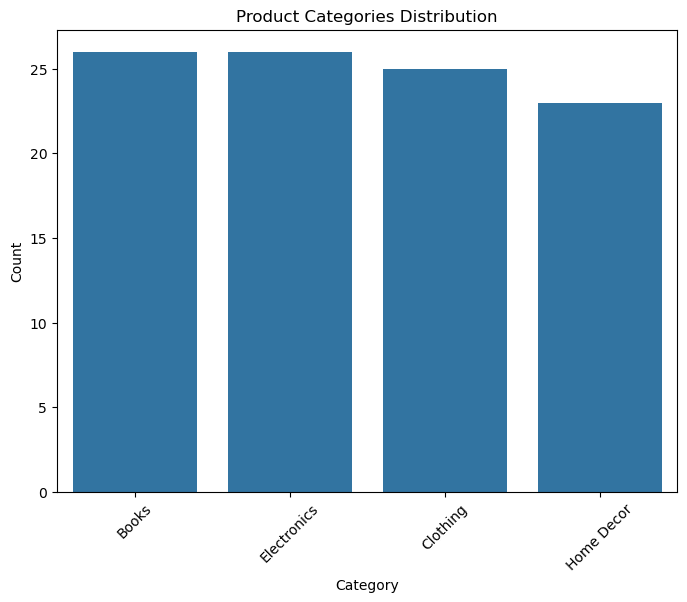

In [18]:
# Distribution of Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

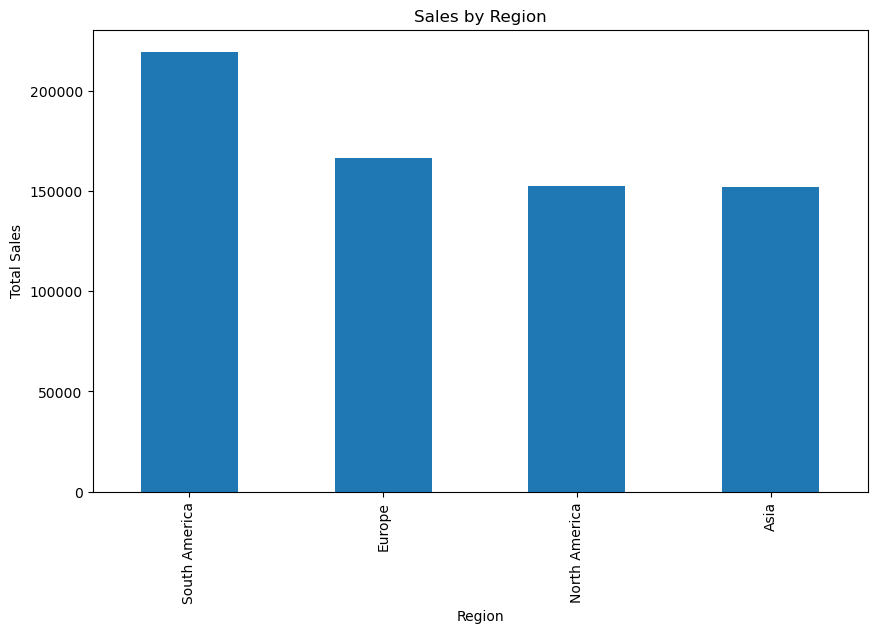

In [20]:
# Sales by Region
region_sales = merged.groupby("Region")['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

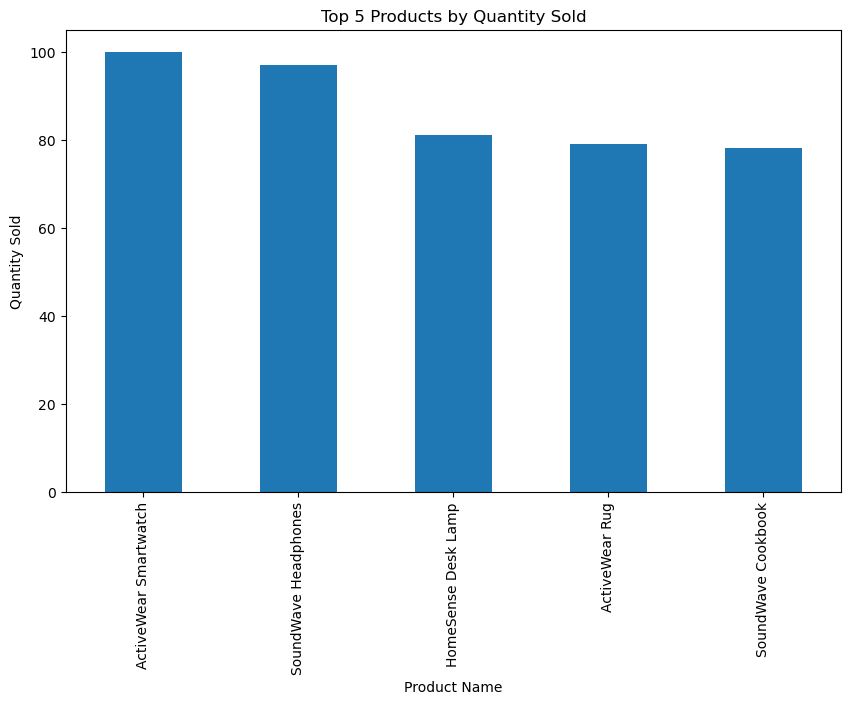

In [22]:
# Top Products by Quantity Sold
top_products = merged.groupby("ProductName")['Quantity'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', figsize=(10, 6), title='Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

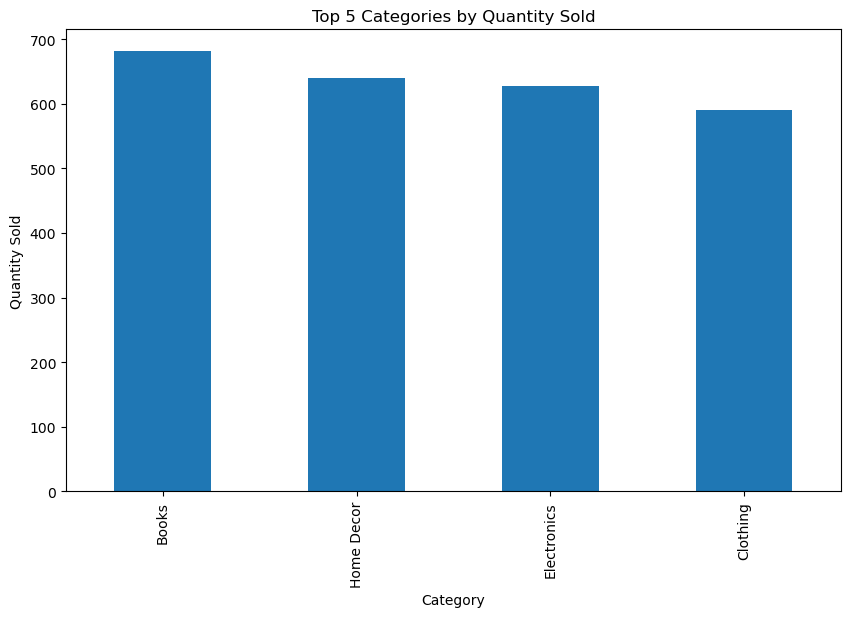

In [24]:
# Top Categories by Quantity Sold
top_categories = merged.groupby("Category")['Quantity'].sum().sort_values(ascending=False).head(5)
top_categories.plot(kind='bar', figsize=(10, 6), title='Top 5 Categories by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.show()

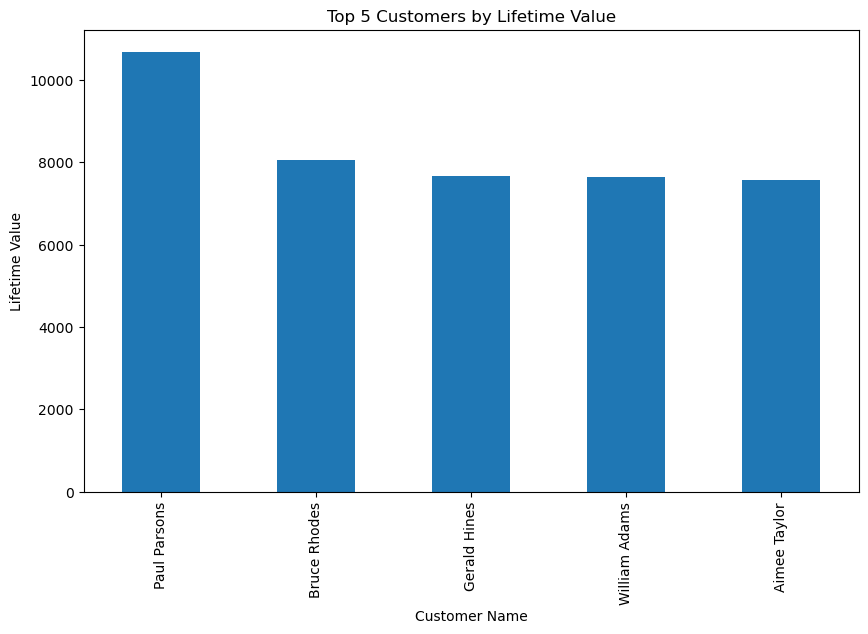

In [26]:
# Customer Lifetime Value
customer_lifetime_value = merged.groupby("CustomerName")['TotalValue'].sum().sort_values(ascending=False).head(5)
customer_lifetime_value.plot(kind='bar', figsize=(10, 6), title='Top 5 Customers by Lifetime Value')
plt.xlabel('Customer Name')
plt.ylabel('Lifetime Value')
plt.show()

In [28]:
# Popular Products by Region
popular_products_by_region = merged.groupby(['Region', 'ProductName'])['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop Products by Region:")
print(popular_products_by_region)


Top Products by Region:
Region         ProductName          
South America  ActiveWear Textbook      38
               ActiveWear Smartwatch    38
North America  SoundWave Headphones     37
Europe         ActiveWear Rug           30
South America  HomeSense Desk Lamp      29
Name: Quantity, dtype: int64


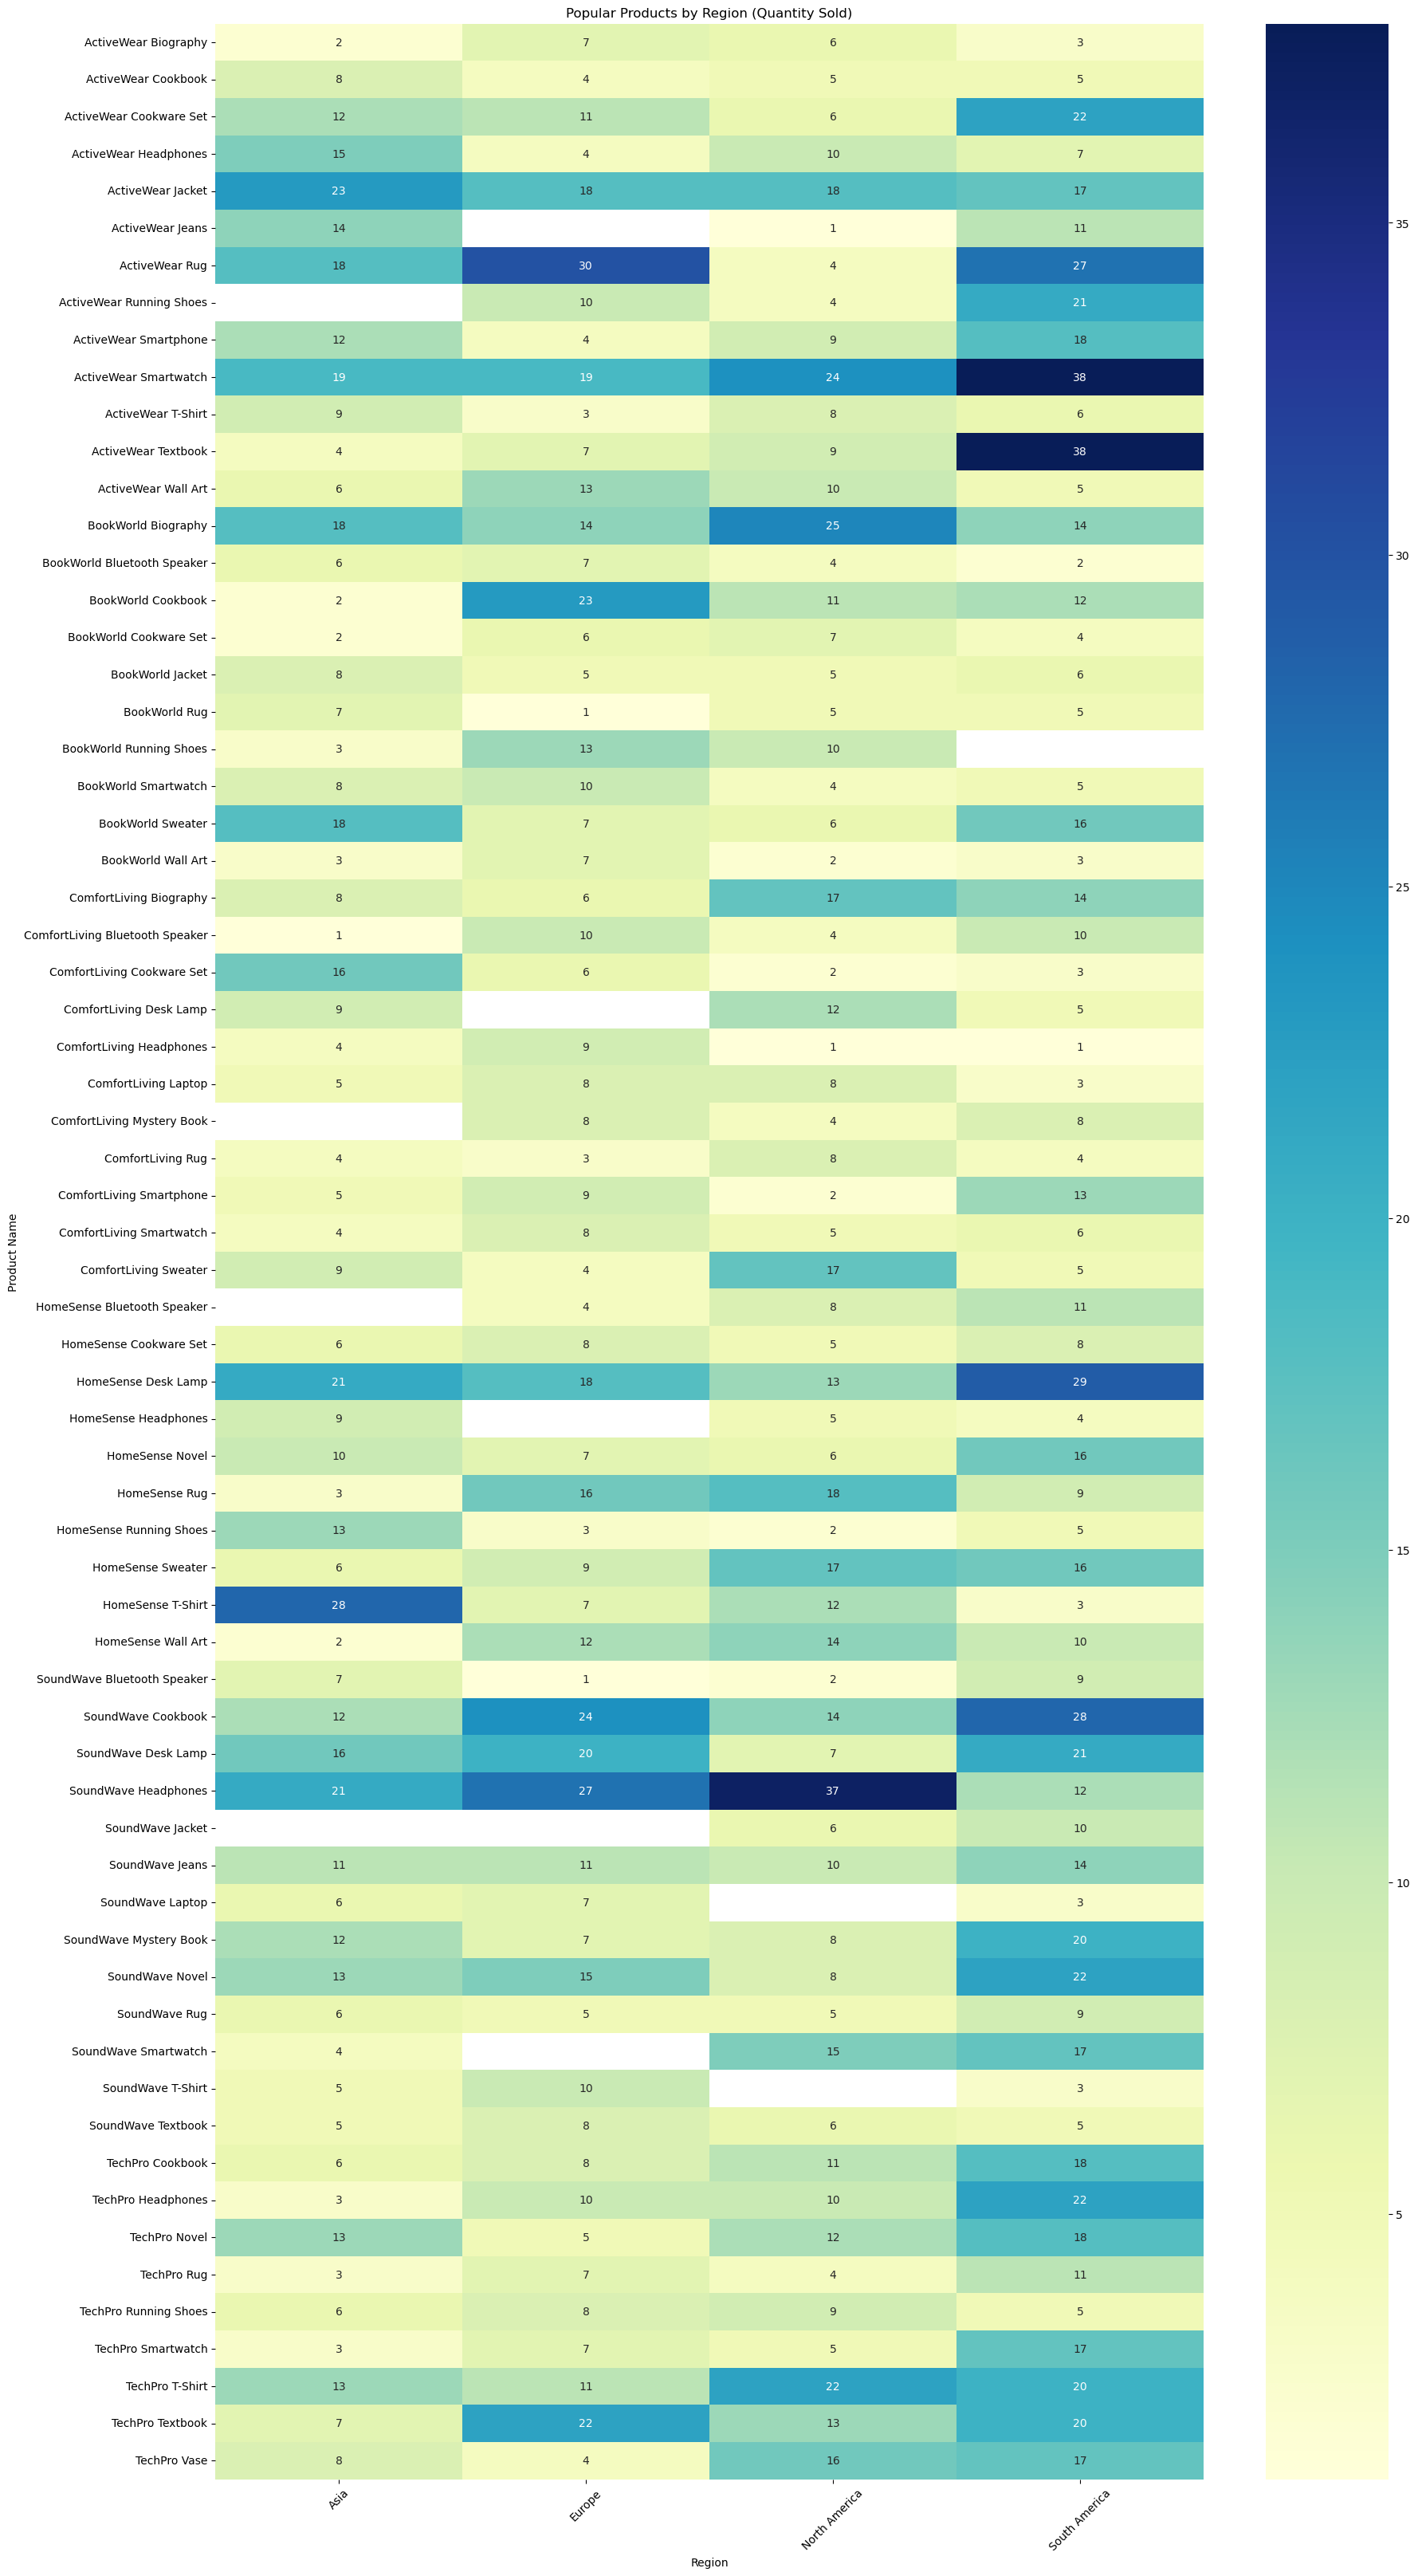

In [30]:

popular_products_by_region = merged.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
heatmap_data = popular_products_by_region.pivot(index="ProductName", columns="Region", values="Quantity")

# Create Heatmap
plt.figure(figsize=(20,40))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="YlGnBu", cbar=True)
plt.title("Popular Products by Region (Quantity Sold)")
plt.xlabel("Region")
plt.ylabel("Product Name")
plt.xticks(rotation=45)
plt.show()

In [38]:
# Insights Extraction
# 1. Most sold product
most_sold_product = merged.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).idxmax()
print(f"The most sold product is '{most_sold_product}', indicating high demand for tech-related accessories.")


The most sold product is 'ActiveWear Smartwatch', indicating high demand for tech-related accessories.


In [42]:
# 2. Best-performing category
most_sold_category = merged.groupby("Category")["Quantity"].sum().sort_values(ascending=False).idxmax()
print(f"The '{most_sold_category}' category leads in sales quantity, suggesting customers prefer affordable and educational products.")

The 'Books' category leads in sales quantity, suggesting customers prefer affordable and educational products.


In [44]:
# 3. Region with highest revenue
highest_revenue_region = merged.groupby("Region")["TotalValue"].sum().sort_values(ascending=False).idxmax()
print(f"{highest_revenue_region} generates the highest revenue, indicating a strong market presence in this region.")


South America generates the highest revenue, indicating a strong market presence in this region.


In [46]:
# 4. High-value customers
top_customers = merged.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("High-value customers like:")
print(top_customers)
print("contribute significantly to revenue; loyalty programs can enhance retention.")

High-value customers like:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64
contribute significantly to revenue; loyalty programs can enhance retention.


In [50]:
# 5. Regional preferences
regional_popular_products = merged.groupby(["Region", "ProductName"])["Quantity"].sum().reset_index()
popular_products_by_region = regional_popular_products.sort_values(by="Quantity", ascending=False).groupby("Region").first()
print("Regional preferences highlight varying demands:")
print(popular_products_by_region)

Regional preferences highlight varying demands:
                        ProductName  Quantity
Region                                       
Asia              HomeSense T-Shirt        28
Europe               ActiveWear Rug        30
North America  SoundWave Headphones        37
South America   ActiveWear Textbook        38


In [54]:
# 6. Categories closely following Books
top_categories = merged.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
print("Top categories by sales quantity:")
print(top_categories)

Top categories by sales quantity:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [56]:
# 7. Average transaction value by region
avg_transaction_value_region = merged.groupby("Region")["TotalValue"].mean()
highest_avg_transaction_region = avg_transaction_value_region.idxmax()
print(f"The average transaction value is highest in {highest_avg_transaction_region}, indicating potential for premium product offerings.")

The average transaction value is highest in South America, indicating potential for premium product offerings.


In [58]:
# 8. Seasonal trends (peak sales in Q4)
merged["TransactionDate"] = pd.to_datetime(merged["TransactionDate"])
merged["Quarter"] = merged["TransactionDate"].dt.quarter
sales_by_quarter = merged.groupby("Quarter")["TotalValue"].sum()
print("Seasonal trends in transaction data:")
print(sales_by_quarter)
print("suggest peak sales in Q3 or Q4, aligning with holiday seasons.")

Seasonal trends in transaction data:
Quarter
1    165664.39
2    170817.98
3    205406.88
4    148106.31
Name: TotalValue, dtype: float64
suggest peak sales in Q3 or Q4, aligning with holiday seasons.


In [60]:
# 9. Customers in Asia preferring affordable products
asia_avg_transaction = merged[merged["Region"] == "Asia"]["TotalValue"].mean()
print(f"Customers in Asia show a preference for affordable products, as indicated by a lower average transaction value of {asia_avg_transaction:.2f}.")

Customers in Asia show a preference for affordable products, as indicated by a lower average transaction value of 697.59.


In [64]:
# 10. Products with high unit prices contributing to revenue
high_price_products = products[products["Price"] > products["Price"].quantile(0.75)]
high_price_revenue = merged[merged["ProductID"].isin(high_price_products["ProductID"])]
print("Products with high unit prices, like TechPro gadgets, contribute significantly to revenue:")
print(high_price_revenue.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False))

Products with high unit prices, like TechPro gadgets, contribute significantly to revenue:
ProductName
ActiveWear Smartwatch         25925.80
SoundWave Novel               24507.90
TechPro Headphones            19513.80
ActiveWear Rug                17946.91
TechPro Cookbook              17905.20
TechPro Smartwatch            13778.88
ComfortLiving Smartphone      13232.12
TechPro Textbook              12941.76
ActiveWear Textbook           12214.02
HomeSense Cookware Set        12078.18
BookWorld Cookbook            11238.49
ActiveWear Jeans              11161.54
BookWorld Sweater             10690.25
HomeSense Running Shoes       10405.66
TechPro T-Shirt               10303.44
TechPro Novel                 10286.29
BookWorld Biography            9576.05
ActiveWear Cookware Set        9545.13
ComfortLiving Mystery Book     8737.80
SoundWave T-Shirt              8672.04
SoundWave Cookbook             8403.00
SoundWave Smartwatch           6897.90
ActiveWear Headphones          5990.10
